In [16]:
## Análisis de marketing plataforma Showz
### Por: Erika Sánchez


In [17]:
# importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Cargar y leer DF

visits = pd.read_csv("/content/visits_log_us.csv")
orders = pd.read_csv("/content/orders_log_us.csv")
costs = pd.read_csv("/content/costs_us.csv")



In [18]:
# Estudiar información general

print(visits.info())
print(visits.head())

print(orders.info())
print(orders.head())

print(costs.info())
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   996969

In [19]:
# Renombrar columnas visits

new_col_names=[]

for old_name in visits.columns:
    name_stripped= old_name.strip()
    name_lowered= name_stripped.lower()
    name_no_spaces= name_lowered.replace(" ", "_")
    new_col_names.append(name_no_spaces)
visits.columns= new_col_names

print(visits.head())

    device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [20]:
# Renombrar columnas orders

new_col_names=[]

for old_name in orders.columns:
    name_stripped= old_name.strip()
    name_lowered= name_stripped.lower()
    name_no_spaces= name_lowered.replace(" ", "_")
    new_col_names.append(name_no_spaces)
orders.columns= new_col_names

print(orders.head())



                buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [21]:
# Renombrar columnas costs

new_col_names=[]

for old_name in costs.columns:
    name_stripped= old_name.strip()
    name_lowered= name_stripped.lower()
    name_no_spaces= name_lowered.replace(" ", "_")
    new_col_names.append(name_no_spaces)
costs.columns= new_col_names

print(costs.head())


   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [22]:
# Convertir columnas de datos a tipo correcto

visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

## Informes y métricas

### 1. Visitas

<function matplotlib.pyplot.show(close=None, block=None)>

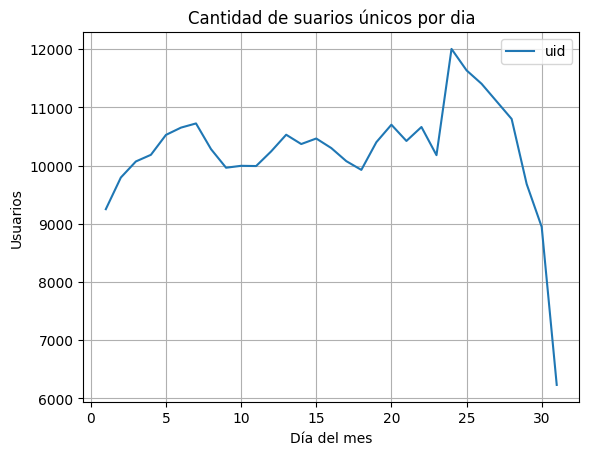

In [23]:

# agregar columnas de dia, semana y mes

visits["day"]=pd.to_datetime(visits['start_ts']).dt.day
visits["week"]=pd.to_datetime(visits['start_ts']).dt.isocalendar().week.astype(int)
visits["month"]=pd.to_datetime(visits['start_ts']).dt.month

#agrupar el DF por estas columnas y contar usuarios unicos

visits_day= visits.groupby("day").agg({"uid":"nunique"}).reset_index()
visits_week= visits.groupby("week").agg({"uid":"nunique"}).reset_index()
vistis_month= visits.groupby("month").agg({"uid":"nunique"}).reset_index()

#informe de visitas de usuarios unicos por dia

visits_day.plot(x="day", y="uid", title="Cantidad de suarios únicos por dia", xlabel="Día del mes", ylabel="Usuarios", grid=True)
plt.show

En el informe de cantidad de usuarios unicos por mes, se puede visualizar que tiene una tendencia creciente, teniendo el pico mas alto de usuarios cerca a los dias 25 de cada mes siendo los dias que mas se reciben visitas de usuarios. Hay que decirle al equipo de marketing que genere estrategias para incrementar las visitas en los primeros dias del mes que es donde mas baja esta la tendencia

<function matplotlib.pyplot.show(close=None, block=None)>

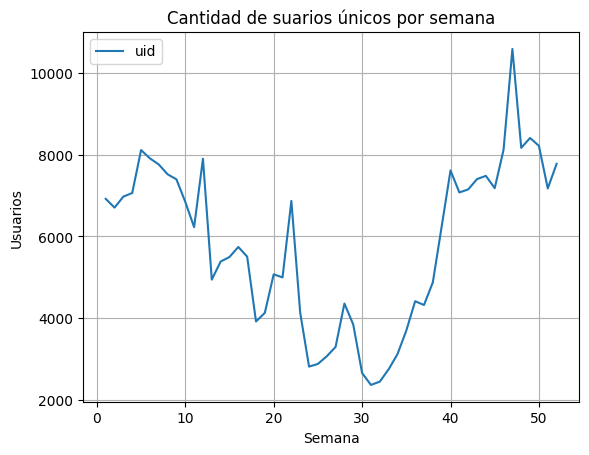

In [24]:
#informe de visitas de usuarios unicos por semana

visits_week.plot(x="week", y="uid", title="Cantidad de suarios únicos por semana", xlabel="Semana", ylabel="Usuarios", grid=True)
plt.show

El comportamiento de la gráfica coincide con la tendencia por mes, donde nos encontramos con un comportamiento a la baja las priemras semanas del año y a partir de la semana 29 aproximadamente hay un punto de inflexion donde el comportamiento cambia totalmente. Puede ser que el comportamiento de los usuarios sea estacional y tengan mas motivación de participar en eventos en los ultimos meses del año que en los primeros.

<function matplotlib.pyplot.show(close=None, block=None)>

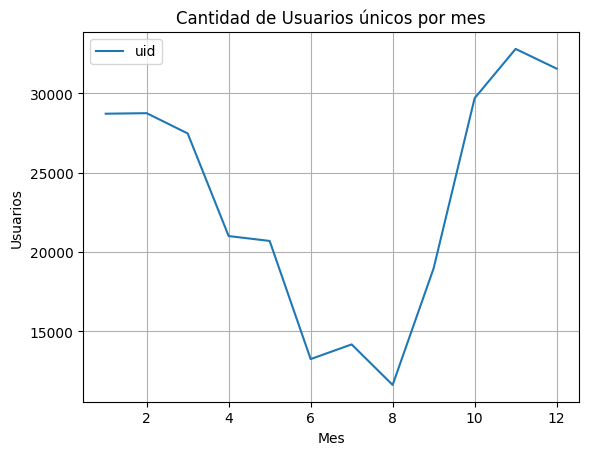

In [25]:
#informe de visitas de usuarios unicos por mes

vistis_month= visits.groupby("month").agg({"uid":"nunique"}).reset_index()
vistis_month.plot(x="month", y="uid", title="Cantidad de Usuarios únicos por mes", xlabel="Mes", ylabel="Usuarios", grid=True)
plt.show

En la grafica de usuarios unicos por mes, podemos ver una curva inversa donde los puntos de inflexion son los meses con menos visitas de usuarios unicos (entre junio y agosto). Posterior al mes de agosto la curva presenta una tendencia positiva con mayor visita de usuarios en los meses de noviembre y diciembre (posiblemente los meses d)

<function matplotlib.pyplot.show(close=None, block=None)>

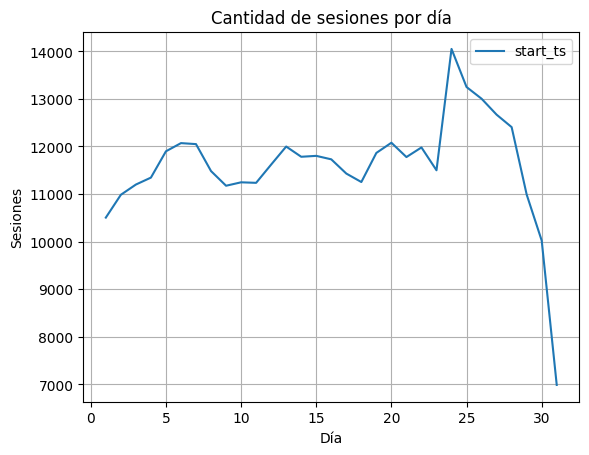

In [26]:
#agrupar el DF por dia y contar sesiones
visits_sesions= visits.groupby("day").agg({"start_ts":"count"}).reset_index()

#informe de cantidad de sesiones por dia

visits_sesions.plot(x="day", y="start_ts", title="Cantidad de sesiones por día", xlabel="Día", ylabel="Sesiones", grid=True)
plt.show

En general las sesiones diarias se mantienen entre 30.000 y 38.000 con fluctuaciones muy constantes. Se observan varios picos también indicando dias de mayor actividad (dias 7, 13 aprox). al final se observa una caida muy pronunciada que podría deberse a un error de registro o un desenso temporal de actividad

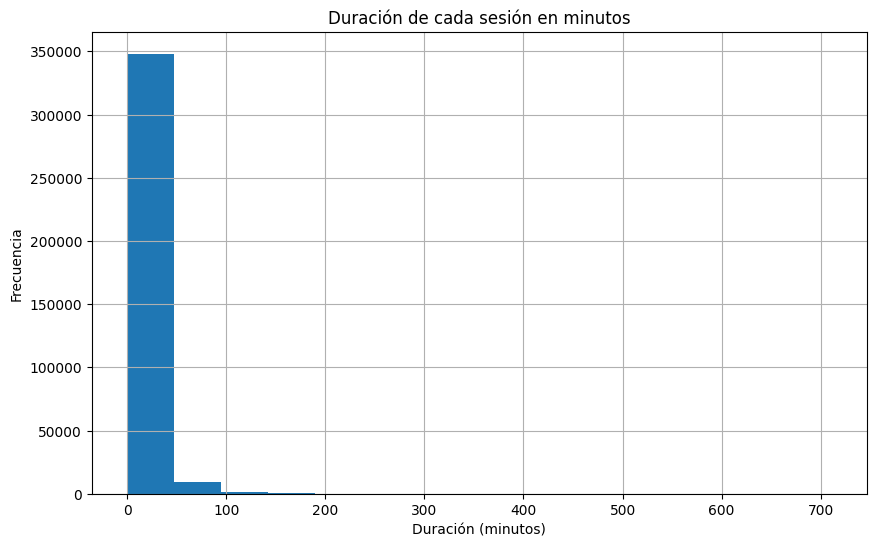

In [27]:
#Calcular duracion de cada sesion

visits["visits_duration"]= (visits["end_ts"]-visits["start_ts"]).dt.total_seconds() / 60

# Reemplazar valores negativos
visits["visits_duration"] = visits["visits_duration"].clip(lower=0)

#informe de duracion de cada sesion en minutos


visits["visits_duration"].hist(bins=15, figsize=(10, 6))
plt.title("Duración de cada sesión en minutos")
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.show()


La mayoria de las sesiones (mas de 800.000) estan en una duracion de 0 a 50 minutos aprox y menos de 100.000 sesiones tuvieron una duración mayor a 50 minutos.

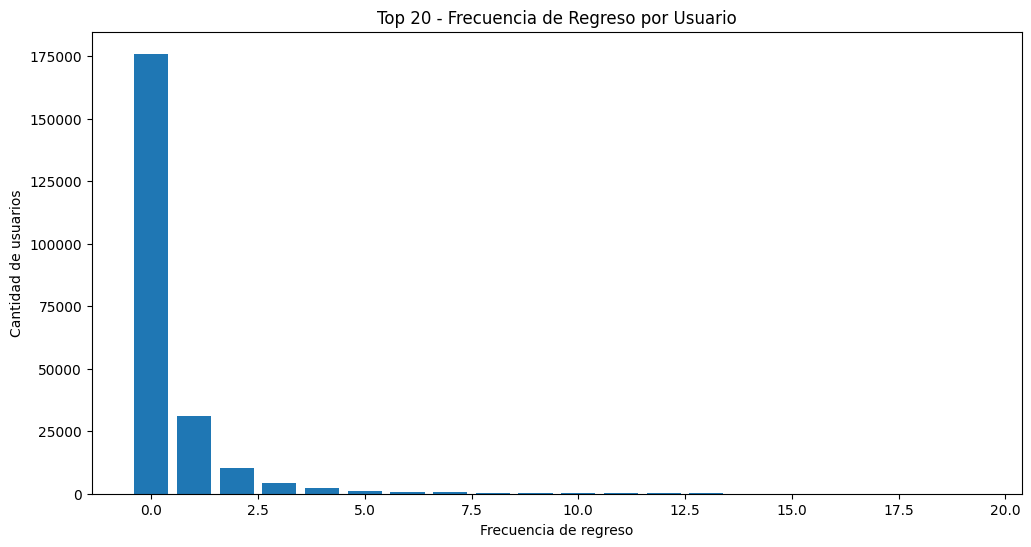

In [28]:
# calcular con que frecuencia los usuarios regresan (frecuencia de visita por usuario - 1 visita, la primera)

visits_per_user=visits.groupby("uid").agg({"start_ts":"count"}).reset_index()

# Restar 1 para obtener solo las "visitas de regreso"
visits_per_user["frecuencia_regreso"] = visits_per_user["start_ts"] - 1

# Reemplazar valores negativos (por si algún usuario solo tiene 1 visita)
visits_per_user["frecuencia_regreso"] = visits_per_user["frecuencia_regreso"].clip(lower=0)

#informe de frecuencia de regresos x usuario

visits_per_user.head(10)

#contar las frecuencias
frecuencia_counts = visits_per_user["frecuencia_regreso"].value_counts().sort_index()

# limitar a los primeros 20 valores y graficar

frecuencia_top20 = frecuencia_counts.head(20)
plt.figure(figsize=(12, 6))
plt.bar(frecuencia_top20.index, frecuencia_top20.values)
plt.title("Top 20 - Frecuencia de Regreso por Usuario")
plt.xlabel("Frecuencia de regreso")
plt.ylabel("Cantidad de usuarios")
plt.show()



La mayoria de usuarios (175.000) no vuelven a ingresar a la plataforma de compra de eventos. Menos de 50.000 usuarios volvieron a comprar en el aplicativo entre 1 y 7,5 veces.

### 2. Ventas

In [29]:
# Asegurar formato datetime
visits["start_ts"] = pd.to_datetime(visits["start_ts"])
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"])

# Fecha de primera sesión por usuario
first_session_per_user = visits.groupby("uid")["start_ts"].min().reset_index()
first_session_per_user.columns = ["uid", "first_session_date"]

# Unir con visits
visits = visits.merge(first_session_per_user, on="uid", how="left")

# Unir con orders
visits = visits.merge(orders, on="uid", how="left")

# Crear columnas de fecha
visits["first_session_day"] = visits["first_session_date"].dt.date
visits["buy_day"] = visits["buy_ts"].dt.date

# Calcular días de conversión
visits["conversion_days"] = (visits["buy_day"] - visits["first_session_day"]).apply(
    lambda x: x.days if pd.notna(x) else np.nan
)
visits["conversion_days"] = visits["conversion_days"].clip(lower=0)

# Tabla dinámica
results = visits.pivot_table(
    index="first_session_date",
    columns="conversion_days",
    values="uid",
    aggfunc="nunique",
    fill_value=0
)

# Limpiar columnas sin conversiones
results_clean = results.loc[:, results.sum() > 0]

print(results_clean)

conversion_days      0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    \
first_session_date                                                            
2017-06-01 00:09:00      1      0      0      0      0      0      0      0   
2017-06-01 00:14:00      2      0      0      0      0      0      0      0   
2017-06-01 00:25:00      1      0      0      0      0      0      0      0   
2017-06-01 01:18:00      0      0      0      0      0      0      0      0   
2017-06-01 01:28:00      0      0      0      0      0      0      0      0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2018-05-31 23:26:00      1      0      0      0      0      0      0      0   
2018-05-31 23:31:00      1      0      0      0      0      0      0      0   
2018-05-31 23:35:00      1      0      0      0      0      0      0      0   
2018-05-31 23:52:00      1      0      0      0      0      0      0      0   
2018-05-31 23:59:00      0      1      0      0     

In [30]:
#Pedidos al mes de cada cohorte

visits["buy_month"]=visits["buy_ts"].dt.month
orders_month= visits.pivot_table(
    index= "first_session_date",
    columns="buy_month",
    values="buy_ts",
    aggfunc= "count",
    fill_value=0
)
print(orders_month)

buy_month            1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_session_date                                                          
2017-06-01 00:09:00     0     0     0     0     0     1     0     0     0   
2017-06-01 00:14:00     0     0     0     0     0     2     0     0     0   
2017-06-01 00:25:00     0     0     0     0     0     1     0     0     0   
2017-06-01 01:18:00     0     0     0     0     0     0    60     0     0   
2017-06-01 01:28:00     0     0     0     0     0     0     0     3     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2018-05-31 23:26:00     0     0     0     0     1     0     0     0     0   
2018-05-31 23:31:00     0     0     0     0     1     0     0     0     0   
2018-05-31 23:35:00     0     0     0     0     1     0     0     0     0   
2018-05-31 23:52:00     0     0     0     0     1     0     0     0     0   
2018-05-31 23:59:00     0     0     0     0     0     1     0     0     0   

In [31]:
#tamaño promedio de compra de cada cohorte en dinero.

order_size_mean= visits.pivot_table(
    index="first_session_date",
    columns="buy_month",
    values="revenue",
    aggfunc= "mean",
    fill_value=0
)
print(order_size_mean)

#tamaño promedio de los pedidos en total

mean_orders= visits["revenue"].mean()
print("El tamaño promedio en $ de pedidos es: ", mean_orders)


buy_month            1.0   2.0   3.0   4.0   5.0    6.0   7.0   8.0   9.0   \
first_session_date                                                           
2017-06-01 00:09:00   0.0   0.0   0.0   0.0  0.00  17.00  0.00  0.00   0.0   
2017-06-01 00:14:00   0.0   0.0   0.0   0.0  0.00   0.55  0.00  0.00   0.0   
2017-06-01 00:25:00   0.0   0.0   0.0   0.0  0.00   0.37  0.00  0.00   0.0   
2017-06-01 01:18:00   0.0   0.0   0.0   0.0  0.00   0.00  1.67  0.00   0.0   
2017-06-01 01:28:00   0.0   0.0   0.0   0.0  0.00   0.00  0.00  1.47   0.0   
...                   ...   ...   ...   ...   ...    ...   ...   ...   ...   
2018-05-31 23:26:00   0.0   0.0   0.0   0.0  0.92   0.00  0.00  0.00   0.0   
2018-05-31 23:31:00   0.0   0.0   0.0   0.0  0.61   0.00  0.00  0.00   0.0   
2018-05-31 23:35:00   0.0   0.0   0.0   0.0  2.26   0.00  0.00  0.00   0.0   
2018-05-31 23:52:00   0.0   0.0   0.0   0.0  0.30   0.00  0.00  0.00   0.0   
2018-05-31 23:59:00   0.0   0.0   0.0   0.0  0.00   3.42  0.00  

In [32]:
#Calcular ingresos totales y usuarios unicos
total_revenue = visits["revenue"].sum()
unique_users = visits["uid"].nunique()

# Calcular LTV total
ltv_total = total_revenue / unique_users

print("LTV total: $", ltv_total)

#calcular LVT por cohortes

lvt_cohorts= visits.pivot_table(
    index="first_session_date",
    columns="buy_month",
    values="revenue",
    aggfunc="sum",
    fill_value=0
)
print(lvt_cohorts)

LTV total: $ 30.51337977551727
buy_month            1.0   2.0   3.0   4.0   5.0    6.0    7.0   8.0   9.0   \
first_session_date                                                            
2017-06-01 00:09:00   0.0   0.0   0.0   0.0  0.00  17.00    0.0  0.00   0.0   
2017-06-01 00:14:00   0.0   0.0   0.0   0.0  0.00   1.10    0.0  0.00   0.0   
2017-06-01 00:25:00   0.0   0.0   0.0   0.0  0.00   0.37    0.0  0.00   0.0   
2017-06-01 01:18:00   0.0   0.0   0.0   0.0  0.00   0.00  100.2  0.00   0.0   
2017-06-01 01:28:00   0.0   0.0   0.0   0.0  0.00   0.00    0.0  4.41   0.0   
...                   ...   ...   ...   ...   ...    ...    ...   ...   ...   
2018-05-31 23:26:00   0.0   0.0   0.0   0.0  0.92   0.00    0.0  0.00   0.0   
2018-05-31 23:31:00   0.0   0.0   0.0   0.0  0.61   0.00    0.0  0.00   0.0   
2018-05-31 23:35:00   0.0   0.0   0.0   0.0  2.26   0.00    0.0  0.00   0.0   
2018-05-31 23:52:00   0.0   0.0   0.0   0.0  0.30   0.00    0.0  0.00   0.0   
2018-05-31 23:59:00  

### 3. Marketing

El total de dinero gastado en marketing fue: $ 329131.62


<Axes: title={'center': 'Dinero gastado en marketing por fuente de adquisición'}, xlabel='Fuente', ylabel='Costo - $'>

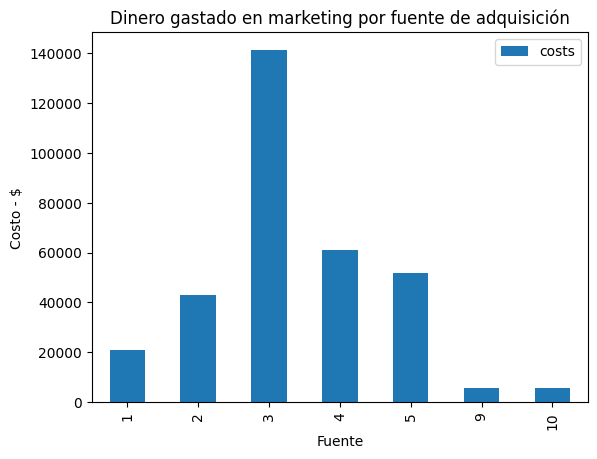

In [33]:
# #dinero gastado en marketing total
total_cost_marketing= costs["costs"].sum()
print("El total de dinero gastado en marketing fue: $", total_cost_marketing)

# #dinero gastado por fuente de adquisión
costs_source= costs.groupby("source_id").agg({"costs": "sum"}).reset_index()
costs_source.plot(x="source_id", y="costs", kind= "bar", title="Dinero gastado en marketing por fuente de adquisición", xlabel= "Fuente", ylabel="Costo - $")


La fuente de adquisición con la cual se gasto mas dinero fue la 3, seguida de la 4 y posteriormente la 5

<Axes: title={'center': 'Dinero gastado en marketing por mes'}, xlabel='Mes', ylabel='Costo - $'>

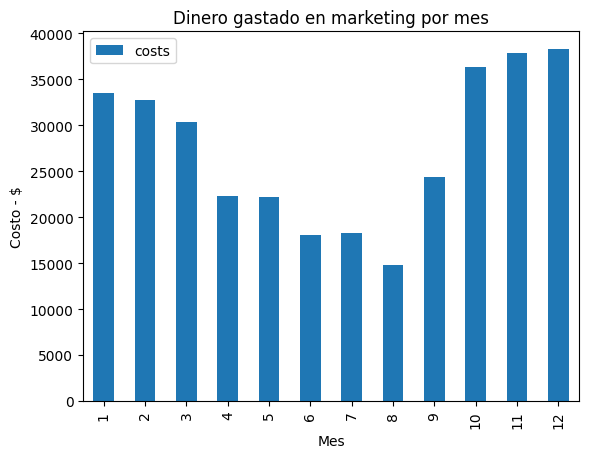

In [34]:
# #dinero gastado en marketing a lo largo del tiempo (meses)
costs["month"]=costs["dt"].dt.month
costs_marketing_date= costs.groupby("month")["costs"].sum().reset_index()
costs_marketing_date.plot(x="month", y="costs", kind= "bar", title="Dinero gastado en marketing por mes", xlabel= "Mes", ylabel="Costo - $")

El ultimo trimestre del año fue donde mas se gasto dinero en marketing (Oct, nov y dic), seguido del primer trimestre del año (ene, feb y marz)

El CAC por fuente es:     source_id       CAC
0          1  1.096546
1          2  1.631017
2          3  1.890439
3          4  0.731201
4          5  0.908434
5          9  0.595584
6         10  0.721766


<Axes: title={'center': 'CAC x fuente'}, xlabel='Fuente', ylabel='CAC'>

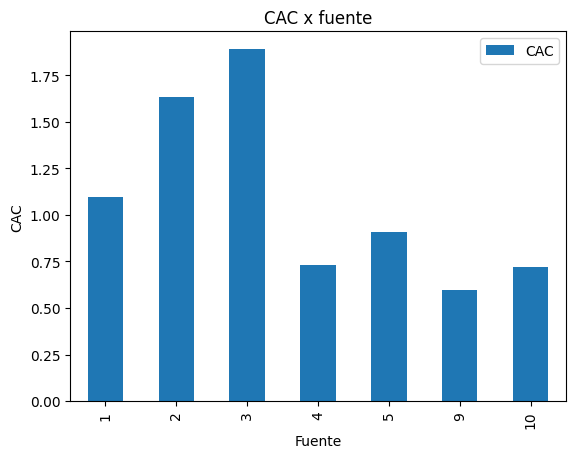

In [35]:
#costo de adquisición de clientes de cada fuente (CAC)
usersx_source= visits.groupby("source_id")["uid"].nunique().reset_index()
cacx_source = costs_source.merge(usersx_source, on="source_id")
cacx_source["CAC"] = cacx_source["costs"] / cacx_source["uid"]
print("El CAC por fuente es: ", cacx_source[["source_id", "CAC"]])
cacx_source.plot(x="source_id", y="CAC", kind= "bar", title="CAC x fuente", xlabel= "Fuente", ylabel="CAC")


El costo de adquisición de cliente mas alto lo tiene la fuente 3, seguido de la fuente 2 y la 1

<Axes: title={'center': 'LTV x fuente'}, xlabel='Fuente', ylabel='LTV'>

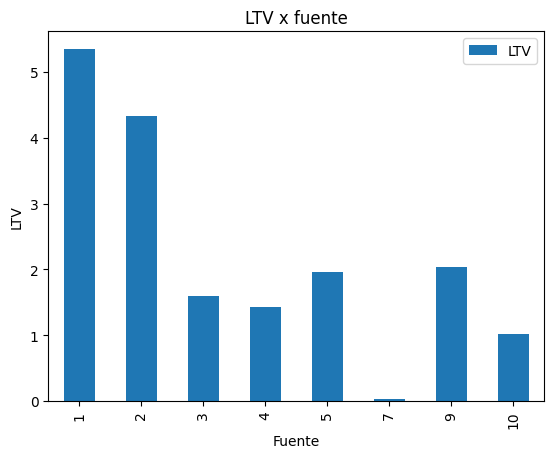

In [36]:
#Calcular LTV por fuente
ordersx_source = orders.merge(visits[["uid", "source_id"]].drop_duplicates(), on="uid")

# Revenue total por fuente
total_revenue_source = ordersx_source.groupby("source_id")["revenue"].sum().reset_index()
total_revenue_source.rename(columns={"revenue": "total_revenue"}, inplace=True)

# Cantidad de usuarios adquiridos por cada fuente es igual a usersx_source
usersx_source.rename(columns={"uid": "total_users"}, inplace=True)
# lvt
ltvx_source = total_revenue_source.merge(usersx_source, on="source_id")

ltvx_source["LTV"] = ltvx_source["total_revenue"] / ltvx_source["total_users"]

#graficar LTV por fuente

ltvx_source.plot(x="source_id", y="LTV", kind= "bar", title="LTV x fuente", xlabel= "Fuente", ylabel="LTV")



Las fuentes con mayor LVT (valor del ciclo de vida del cliente)son la 1 y 2 respectivamente. La fuente con la menor LVT (Casi nula) es la 7.

<Axes: title={'center': 'ROMI x fuente'}, xlabel='Fuente', ylabel='ROMI'>

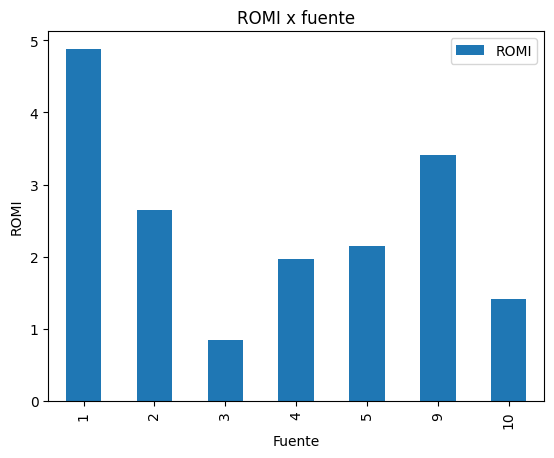

In [37]:
#ROMI
# 4. Unir ambas tablas cacx_source y lvtx_source
romi_ = ltvx_source.merge(cacx_source, on="source_id")

# 5. Calcular ROMI

romi_["ROMI"]= romi_["LTV"]/romi_["CAC"]

romi_.plot(x="source_id", y="ROMI", kind= "bar", title="ROMI x fuente", xlabel= "Fuente", ylabel="ROMI")

Recomiendo priorizar las fuentes 1 y 9, ya que presentan los ROMI más altos y un CAC bajo respecto a su LTV. En contraste, las fuentes 3 y 10 tienen los resultados mas bajos, por lo que conviene reducir la inversión o ajustar las campañas.